## Lab #5 - Functions for Statics Problems

In [3]:
import numpy as np
from pint import UnitRegistry

# Create a unit registry object in pint
ureg = UnitRegistry()
print(ureg)

ModuleNotFoundError: No module named 'pint'

## Practice Statics Problem

In [1]:
from PIL import Image
from IPython.display import display
prob1 = Image.open('Problem #1.png')
display(prob1)

KeyboardInterrupt: 

Problem #1: Three forces act on the bracket.  Determine the magnitude and direction theta of F so that the resultant force is directed along the postive x' axis and has a magnitude of 8 kN

The Solution to this problem is as follows:

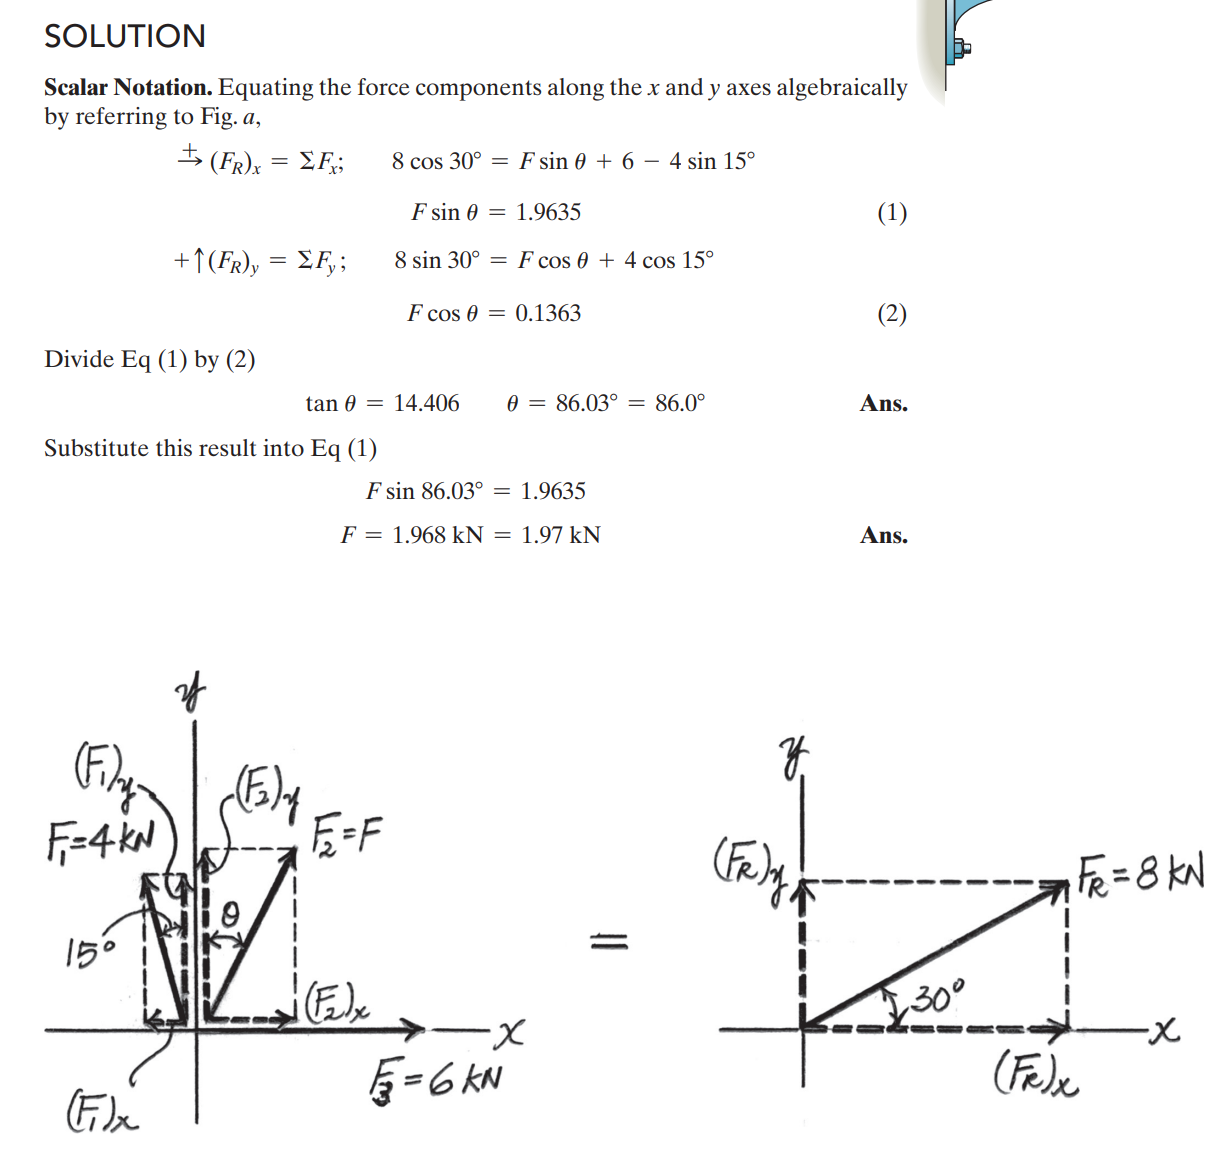

In [4]:
prob1_solution = Image.open('Problem#1_Solution.png')
display(prob1_solution)

#### Step 1: Setup the problem
Let's start this problem by first defining variables and objects for the quantifies that we know given the problem statement

In [2]:
F_1 = 4 * ureg.kilonewton
F_2 = 6 * ureg.kilonewton
F_R = 8 * ureg.kilonewton

# Let's measure the angles from the positive x axis for consistency
theta_1 = (15+90) * ureg.degree # Angle from positive x axis to F_1
theta_2 = 0 * ureg.degree # Angle from positive x axis to F_2
theta_R = 30 * ureg.degree # Angle from positive x axis to resultant force on x'

NameError: name 'ureg' is not defined

#### Step 2: Set up a Force Equilibrium

Use `NumPy`'s built in trig functions for `sin()`, `cos()` and `tan()` and set up equilibirum in both the x and y directions.  We can then use these equilibrium equations to solve for the resultant force (F3) components in both the x and y directions.

In [6]:
# Cos() can be uniformly used in the x direction if we define all angles from the same axis and
# make appropriate adjustments from the figure
F_3_x = (F_R * np.cos(theta_R) - F_1 * np.cos(theta_1) - F_2 * np.cos(theta_2))
F_3_y = (F_R * np.sin(theta_R) - F_1 * np.sin(theta_1) - F_2 * np.sin(theta_2))

In [7]:
print("Sum of the forces in the x direction is", F_3_x)
print("Sum of the forces in the y direction is", F_3_y)

Sum of the forces in the x direction is 1.9634794106855935 kilonewton
Sum of the forces in the y direction is 0.1362966948437263 kilonewton


Take a pause here!  Do these numbers match the solution we were given?

#### Step 3: Solve for the two requested quantities

Next, let's find the angle of the resultant force.  What happens when we divide the `F_3_x` force we found by the `F_3_y` force?  Well `F_3_x` is representing the total resultant force (F3) in the x direction, which means that by our sign convention, `F_3_x` = `F sin(theta)`.  The same goes for the y direction but instead of having sine, we have cosine.  Therefore `F_3_y` = `F cos(theta)`.  If we divide `F sin(theta)` by `F cos(theta)` the F term cancels and we end up with `tan(theta)`.

Okay!  This tells us that if we want to get `theta` which is our resultant angle, we need to take the `arctan()` of `F_3_x/F_3_y`.  So that is the line of code that we need to write.  We'll need to remember that our convention is to measure an angle from the positive x-axis.

In [8]:
theta_3 = np.arctan(F_3_y / F_3_x).to(ureg.degree) # measured from positive x axis
theta_3 = 90 * ureg.degrees - theta_3
print('The angle measured relative to the positive y axis is {0:.2f}.'.format(theta_3))

The angle measured relative to the positive y axis is 86.03 degree.


Double check with the solutions.  Is this correct?

Now let's find the resultant force `F3`.  If `F_3_x = F_3*sin(theta3)` then we can rearrange to solve for `F_3`.  Note, you could also do this with `F_3_y` and `cos()` and you should get the same answer.  Hint: This might be a good way to check if your code is working correctly.

In [9]:
F_3 = F_3_x / np.sin(theta_3)
print('The force magnitude is {0:.2f}.'.format(F_3))

###Check using F_3_y and cos(theta_3)
F_3_check = F_3_y / np.cos(theta_3)
print('Check answer: the force magnitude is {0:.2f}.'.format(F_3_check))

The force magnitude is 1.97 kilonewton.
Check answer: the force magnitude is 1.97 kilonewton.


#### Turn the procedure into a Function
Turning our work above into a function gives us more flexibility to solve problems.  Right now, we can only solve one problem, the problem where the resultant force is 8kN.  But what if we wanted to try different forces?  What if we wanted to play with multiple configurations to see which is the best?  This is where functions come in; they let you automate the calculations and inputs such that you can run all sorts of simulations, and that is the heart of good engineering design.

It is important to note that functions may behave unexpectedly when inputs differ from their intended format. In this example, the function expects inputs with units using Pint (because each Pint object has `magnitude` and `units` attributes). To address this, we added a simple check using `hasattr()` to detect any inputs lacking an attribute called `units`, and provided a clear warning when unitless inputs are found. 

In [4]:
# Define a function that takes force and angle inputs, then outputs a force and angle for 
# force vector 3

def calc_force_angle(F_1, F_2, F_R, th_1, th_2, th_R):
    
    for x in [F_1, F_2, F_R, th_1, th_2, th_R]:
        if not hasattr(x, 'units'):
            print("Warning: At least one of the inputs does not provide units. Results might be erroneous.")

    F_3_x = (F_R * np.cos(th_R) + F_1 * np.cos(th_1) + F_2 * np.cos(th_2))
    F_3_y = (F_R * np.sin(th_R) + F_1 * np.sin(th_1) + F_2 * np.sin(th_2))
    
    # Calculate theta_3
    th_3 = np.arctan(F_3_y / F_3_x).to(ureg.degree) # measured from positive x axis
    th_3 = 90 * ureg.degrees - th_3
    
    # Calculate F_3
    F_3 = F_3_x / np.sin(th_3)
    
    # Return the angle (th_3) and force (F_3)
    return th_3, F_3

In [5]:
F_1 = 4 * ureg.kilonewton
F_2 = 6 * ureg.kilonewton
F_R = 8 * ureg.kilonewton

# Let's measure the angles from the positive x axis for consistency
theta_1 = (15+90) * ureg.degree # Angle from positive x axis to F_1
theta_2 = 0 * ureg.degree # Angle from positive x axis to F_2
theta_R = 30 * ureg.degree # Angle from positive x axis to resultant force on x'

# Call the calc_force_angle() function
theta_3, F_3 = calc_force_angle(F_1, F_2, F_R, theta_1, theta_2, theta_R)

print('The angle measured relative to the positive y axis is {0:.2f}.'.format(theta_3))
print('The force magnitude is {0:.2f}.'.format(F_3))

The angle measured relative to the positive y axis is 56.53 degree.
The force magnitude is 14.26 kilonewton.


## Use the Function to model different forces and angles

Now that we have confirmed the function works with our inputs, let's try changing a few inputs to test the function is general.

### Case #1

In [6]:
# What if we change the angle of theta_2 to be off the x axis but in orthant I
theta_2 = 65 * ureg.degree # Angle from positive x axis to F_2

# Call the calc_force_angle() function
theta_3, F_3 = calc_force_angle(F_1, F_2, F_R, theta_1, theta_2, theta_R)

# Let's focus on the force magnitude only. If we are shifting F_2 off the x axis to a location above F_R, F_3 should be larger to retain the same F_R
print('The force magnitude in case 1 (theta_2 = 60) is {0:.2f}.'.format(F_3))

The force magnitude in case 1 (theta_2 = 60) is 15.75 kilonewton.


### Case #2

In [13]:
# What if we change the angle of theta_2 to be in quadrant II
theta_2 = 110 * ureg.degree # Angle from positive x axis to F_2

# Call the calc_force_angle() function
theta_3, F_3 = calc_force_angle(F_1, F_2, F_R, theta_1, theta_2, theta_R)

# Let's focus on the force magnitude only. If we are shifting F_2 to quadrant II, F_3 should be larger than in case 1 (or the base case) to counteract the negative F_2_x.
print('The force magnitude in case 2 (theta_2 = 110) is {0:.2f}.'.format(F_3))

The force magnitude in case 2 (theta_2 = 110) is 11.43 kilonewton.


### Case #3

In [14]:
# What if we change the angle of theta_2 to be in quadrant III
theta_2 = 210 * ureg.degree # Angle from positive x axis to F_2

# Call the calc_force_angle() function
theta_3, F_3 = calc_force_angle(F_1, F_2, F_R, theta_1, theta_2, theta_R)

# Let's focus on the force magnitude only. If we are shifting F_2 to quadrant III, F_3 should be larger than in case 1 or case 2 (or the base case) to counteract the negative F_2_x and F_2_y.
print('The force magnitude in case 3 (theta_2 = 110) is {0:.2f}.'.format(F_3))

The force magnitude in case 3 (theta_2 = 110) is 13.53 kilonewton.


### Case #4

In [7]:
# What if we change the angle of theta_2 to be in quadrant IV
theta_2 = 350 * ureg.degree # Angle from positive x axis to F_2

# Call the calc_force_angle() function
theta_3, F_3 = calc_force_angle(F_1, F_2, F_R, theta_1, theta_2, theta_R)

# Let's focus on the force magnitude only. If we are shifting F_2 to quadrant IV, F_3 should be smaller than in case 3 (but larger than the base case) because not counteracting a negative F_2_x.
print('The force magnitude in case 4 (theta_2 = 110) is {0:.2f}.'.format(F_3))

The force magnitude in case 4 (theta_2 = 110) is 13.63 kilonewton.


One final check would be to change the resultant force angle and magnitude to check its effect on theta_3 and F_3.

In [8]:
F_1 = 4 * ureg.kilonewton
F_2 = 6 * ureg.kilonewton
F_R = 10 * ureg.kilonewton

# Let's measure the angles from the positive x axis for consistency
theta_1 = (15+90) * ureg.degree # Angle from positive x axis to F_1
theta_2 = 0 * ureg.degree # Angle from positive x axis to F_2
theta_R = 175 * ureg.degree # Angle from positive x axis to resultant force on x'

# Call the calc_force_angle() function
theta_3, F_3 = calc_force_angle(F_1, F_2, F_R, theta_1, theta_2, theta_R)

print('The angle measured relative to the positive y axis is {0:.2f}.'.format(theta_3))
print('The force magnitude is {0:.2f}.'.format(F_3))

The angle measured relative to the positive y axis is 133.46 degree.
The force magnitude is -6.88 kilonewton.


Does this result make sense? Yes! We have shifted the resultant force into orthant II (negative x force) and made it very strongly focused in the x direction. Given F_1 and F_2 are positive, to obtain a negative resultant force, we need force F_3 to be in orthant II.

The angle of 78.66 is positive, meaning it is measured counterclockwise from the positive y axis by our convention.